In [1]:
##########################################################################

# I acknowledge the use of ChatGPT and AI Tools in Helping me Code and Debug the work in this File

##########################################################################

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_final_master_v2.csv"
path = "/scratch/network/mm4846/transcripts_2006_2025_03_31_distinct_pres_vectors.csv"

df = pd.read_csv(path)

# file_path = "/scratch/network/mm4846/transcripts_2006_2025_04_02_DLTR.csv"
# df_dltr = pd.read_csv(file_path)
# import warnings
# warnings.filterwarnings('ignore')

In [111]:
df_new = pd.concat([df, df_dltr], ignore_index=True)


In [114]:
df_new['vector_length'] = df_new['presentation_distinct_vector'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

print(df_new['vector_length'].value_counts(dropna=False))

vector_length
28    31873
Name: count, dtype: int64


In [112]:
len(df_new['presentation_distinct_vector'][0])

28

In [44]:
mention_cols = [col for col in df.columns if col.endswith('_presentation_distinct_mentions')]

mention_mapping = {col.replace('_presentation_distinct_mentions', ''): col for col in mention_cols}
mention_cols = sorted(mention_cols)

# Step 2: Create the vector column
df['presentation_distinct_vector'] = df[mention_cols].values.tolist()

# Example usage:
print(mention_cols)         # Show first 5 column names
print(mention_mapping['ai'])    # Get the full column name for 'ai'

inverse_mapping = {v: k for k, v in mention_mapping.items()}



['ai_presentation_distinct_mentions', 'buyback_presentation_distinct_mentions', 'capex_presentation_distinct_mentions', 'climate_presentation_distinct_mentions', 'commodity_price_presentation_distinct_mentions', 'consumer_demand_presentation_distinct_mentions', 'currency_fluctuations_hedging_presentation_distinct_mentions', 'cybersecurity_data_protection_presentation_distinct_mentions', 'debt_presentation_distinct_mentions', 'dividend_presentation_distinct_mentions', 'esg_sustainability_presentation_distinct_mentions', 'geopolitical_2_presentation_distinct_mentions', 'guidance_forecasts_presentation_distinct_mentions', 'inflation_presentation_distinct_mentions', 'interest_rates_presentation_distinct_mentions', 'labor_presentation_distinct_mentions', 'liquidity_cash_flow_presentation_distinct_mentions', 'm_and_a_presentation_distinct_mentions', 'operational_presentation_distinct_mentions', 'outperform_presentation_distinct_mentions', 'pandemic_presentation_distinct_mentions', 'political

In [45]:
for group, indices in grouped_indices.items():
    df[f'{group}_vector'] = df['presentation_distinct_vector'].apply(lambda row: [row[i] for i in indices])



In [14]:
# index_to_topic = [col.replace('_presentation_distinct_mentions', '') for col in mention_cols]

# # Or if you want a dict:
# index_to_topic_dict = {i: topic for i, topic in enumerate(index_to_topic)}

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_mentions_over_time(
    df,
    grouped_indices,
    index_to_topic_dict,
    assigned_quarter_col='assigned_quarter',
    specific_term=None,
    group=None
):
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2011Q1']  # Only include 2011 and after

    def format_quarters(x):
        return x.strftime('Q%q%Y')  # Q1YYYY format

    def set_xticks(ax, xdata):
        xtick_labels = [q for q in xdata.index if q.quarter == 4]
        ax.set_xticks(xtick_labels)
        ax.set_xticklabels([format_quarters(q) for q in xtick_labels], rotation=0, fontsize=11)

    if specific_term:
        index = next((i for i, topic in index_to_topic_dict.items() if topic == specific_term), None)
        if index is None:
            raise ValueError(f"Term '{specific_term}' not found in index_to_topic_dict")

        df['term_value'] = df['presentation_distinct_vector'].apply(lambda vec: vec[index])
        trend = df.groupby(assigned_quarter_col)['term_value'].mean()

        fig, ax = plt.subplots(figsize=(10, 5))
        trend.plot(ax=ax, label=specific_term)
        set_xticks(ax, trend)
        ax.set_title(f"Distinct Mentions in Presentation for '{specific_term}' Over Time", fontweight='bold', fontsize=14)
        ax.set_xlabel("Calendar Quarter", fontweight='bold', fontsize=12)
        ax.set_ylabel("Avg Mentions", fontweight='bold', fontsize=12)
        ax.legend(fontsize=11)
        ax.tick_params(axis='y', labelsize=11)
        plt.tight_layout()
        plt.show()

    elif group:
        indices = grouped_indices.get(group)
        if not indices:
            raise ValueError(f"Group '{group}' not found or is empty")

        fig, ax = plt.subplots(figsize=(12, 6))
        for i in indices:
            topic = index_to_topic_dict[i]
            df[topic] = df['presentation_distinct_vector'].apply(lambda vec: vec[i])
            trend = df.groupby(assigned_quarter_col)[topic].mean()
            trend.plot(ax=ax, label=topic)

        set_xticks(ax, trend)
        ax.set_title(f"Distinct Mentions in Presentation of Topics in '{group}' Group Over Time", fontweight='bold', fontsize=14)
        ax.set_xlabel("Calendar Quarter", fontweight='bold', fontsize=12)
        ax.set_ylabel("Avg Mentions", fontweight='bold', fontsize=12)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
        ax.tick_params(axis='y', labelsize=11)
        plt.tight_layout()
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(12, 6))
        for group_name, indices in grouped_indices.items():
            df[f'{group_name}_sum'] = df['presentation_distinct_vector'].apply(
                lambda vec: sum(vec[i] for i in indices)
            )
            trend = df.groupby(assigned_quarter_col)[f'{group_name}_sum'].mean()
            trend.plot(ax=ax, label=group_name)

        set_xticks(ax, trend)
        ax.set_title("Distinct Mentions in Presentation by Group Over Time", fontweight='bold', fontsize=14)
        ax.set_xlabel("Calendar Quarter", fontweight='bold', fontsize=12)
        ax.set_ylabel("Average Mentions in Presentation Per Transcript", fontweight='bold', fontsize=12)
        ax.legend(fontsize=11)
        ax.tick_params(axis='y', labelsize=11)
        plt.tight_layout()
        plt.show()


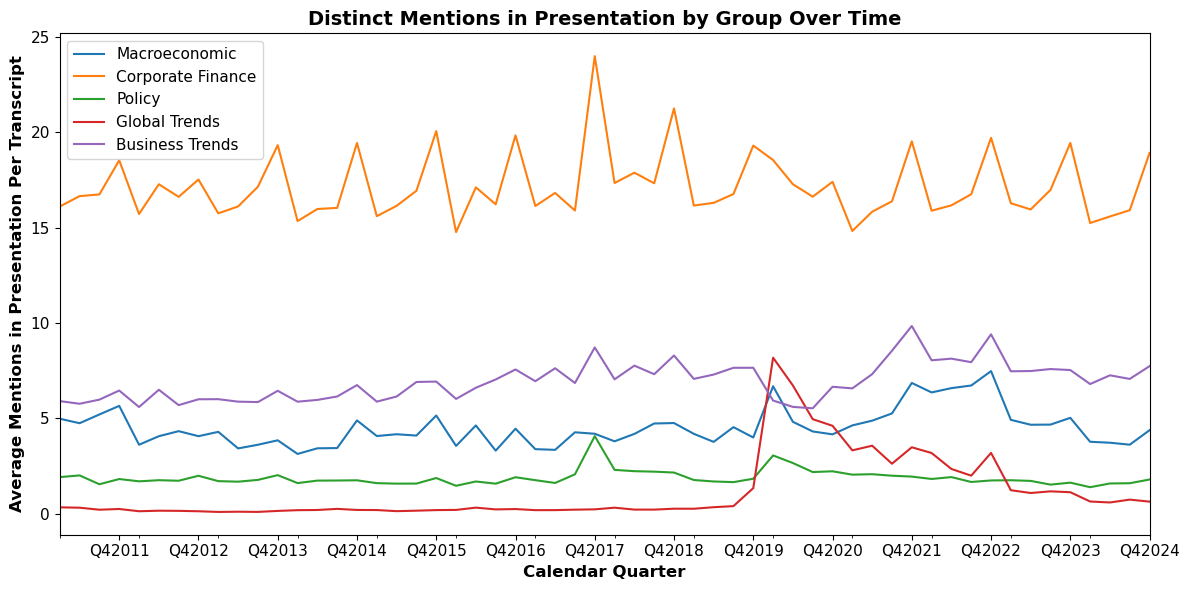

In [22]:
plot_mentions_over_time(df, grouped_indices_theme, index_to_topic_dict)
# plot_mentions_over_time(df, grouped_indices, index_to_topic_dict, specific_term="m_and_a")
# plot_mentions_over_time(df, grouped_indices, index_to_topic_dict, group="episodic")




In [38]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_filtered_mentions_over_time(
    df,
    index_to_topic_dict,
    topic_list,
    assigned_quarter_col='assigned_quarter',
    ticker=None,
    sector=None,
    vector_column='presentation_distinct_vector',
    title_suffix=None
):

    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2011Q1']  # Filter from 2011 onward

    if ticker:
        df = df[df['ticker'] == ticker]
    if sector:
        df = df[df['sector_name_mapped'] == sector]

    # Map topic names to indices
    topic_name_to_index = {v: k for k, v in index_to_topic_dict.items()}
    selected_indices = [topic_name_to_index[name] for name in topic_list if name in topic_name_to_index]

    def format_quarters(x):
        return x.strftime('Q%q%Y')

    def set_q4_xticks(ax, xdata):
        xticks = [q for q in xdata.index if q.quarter == 4]
        ax.set_xticks(xticks)
        ax.set_xticklabels([format_quarters(q) for q in xticks], rotation=45)

    fig, ax = plt.subplots(figsize=(12, 6))

    for idx in selected_indices:
        topic_name = index_to_topic_dict[idx]
        df[topic_name] = df[vector_column].apply(lambda vec: vec[idx])
        trend = df.groupby(assigned_quarter_col)[topic_name].mean()
        trend.plot(ax=ax, label=topic_name)

    set_q4_xticks(ax, trend)
    
    filter_desc = ""
    if ticker: filter_desc += f" — {ticker}"
    if sector: filter_desc += f" — {sector}"
    if title_suffix: filter_desc += f" — {title_suffix}"

    ax.set_title(f"Distinct Mentions in Presentation Over Time{filter_desc}")
    ax.set_xlabel("Calendar Quarter")
    ax.set_ylabel("Avg Mentions")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


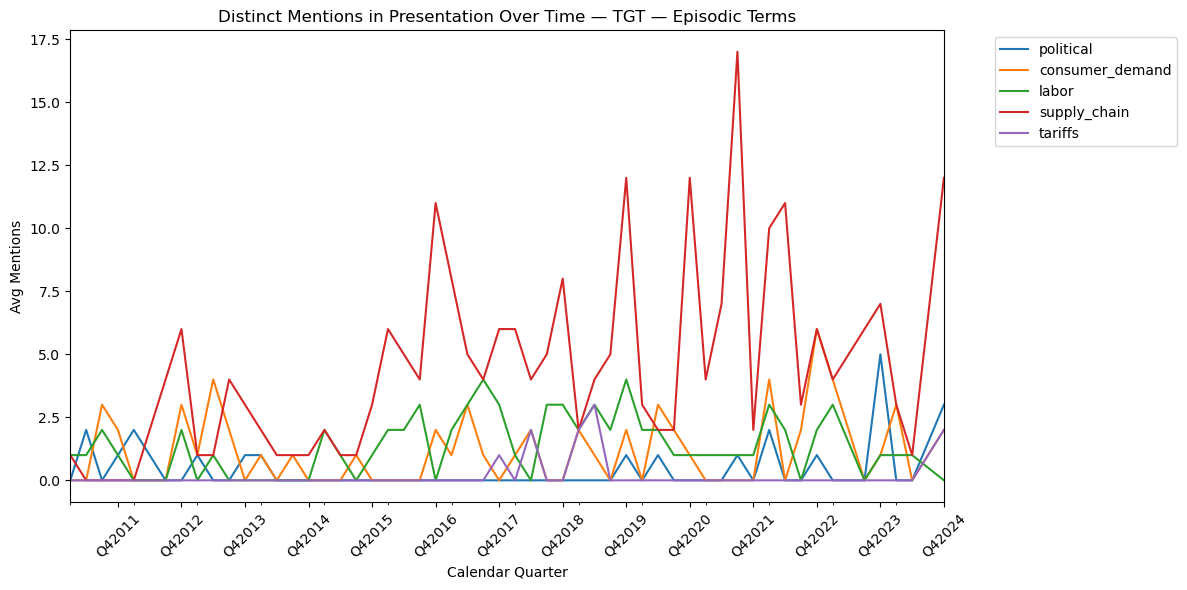

In [37]:
plot_filtered_mentions_over_time(
    df,
    index_to_topic_dict=index_to_topic_dict,
    topic_list= ['political', 'consumer_demand', 'labor', 'supply_chain', 'tariffs'],  # or a pre-defined list like episodic_topics
    ticker='TGT',
    title_suffix='Episodic Terms'
)

In [178]:
def plot_filtered_mentions_vs_sector_median(
    df,
    index_to_topic_dict,
    topic_list,
    assigned_quarter_col='assigned_quarter',
    ticker=None,
    sector=None,
    vector_column='presentation_distinct_vector',
    use= None,  # or 'mean'
    title_suffix=None,
    custom_labels=None  # New argument
):
    assert ticker is not None, "You must specify a ticker"
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2017Q1']

    topic_name_to_index = {v: k for k, v in index_to_topic_dict.items()}
    selected_indices = [topic_name_to_index[name] for name in topic_list if name in topic_name_to_index]

    ticker_df = df[df['ticker'] == ticker]
    if sector is None:
        sector = df[df['ticker'] == ticker]['group_name_mapped'].iloc[0]
    sector_df = df[(df['group_name_mapped'] == sector) & (df['ticker'] != ticker)]

    fig, ax = plt.subplots(figsize=(12, 6))

    # Generate fixed colors for each topic
    color_map = cm.get_cmap('tab10', len(selected_indices))
    topic_colors = {index_to_topic_dict[idx]: mcolors.to_hex(color_map(i)) for i, idx in enumerate(selected_indices)}

    for i, idx in enumerate(selected_indices):
        topic_name = index_to_topic_dict[idx]
        color = topic_colors[topic_name]

        ticker_df[topic_name] = ticker_df[vector_column].apply(lambda vec: vec[idx])
        sector_df[topic_name] = sector_df[vector_column].apply(lambda vec: vec[idx])

        ticker_trend = ticker_df.groupby(assigned_quarter_col)[topic_name].mean()
        sector_trend = (
            sector_df.groupby(assigned_quarter_col)[topic_name].median()
            if use == 'median' else
            sector_df.groupby(assigned_quarter_col)[topic_name].mean()
        )

        label1 = f"{topic_name} — {ticker}"
        label2 = f"{topic_name} — group median"
        if custom_labels and i < len(custom_labels):
            label1 = f"{custom_labels[i]} — {ticker}"
            label2 = f"{custom_labels[i]} — group median"

        ticker_trend.plot(ax=ax, label=label1, color=color, linewidth=2)
        sector_trend.plot(ax=ax, linestyle='--', label=label2, color=color, alpha=0.7, linewidth=2)

    # Generate all Q1 ticks explicitly
    all_quarters = pd.period_range(df[assigned_quarter_col].min(), df[assigned_quarter_col].max(), freq='Q')
    q1_ticks = [q for q in all_quarters if q.quarter == 1]
    ax.set_xticks(q1_ticks)
    ax.set_xticklabels([f'Q1{q.year}' for q in q1_ticks], rotation=0)

    title = f"Distinct Presentation Mentions Over Time — {ticker} vs Median of {sector}"
    if title_suffix:
        title += f" — {title_suffix}"
    ax.set_title(title)
    ax.set_xlabel("Calendar Quarter")
    ax.set_ylabel("Number of Distinct Mentions in Presentation")
    ax.legend(loc='upper left', frameon=True)
    plt.tight_layout()
    plt.show()


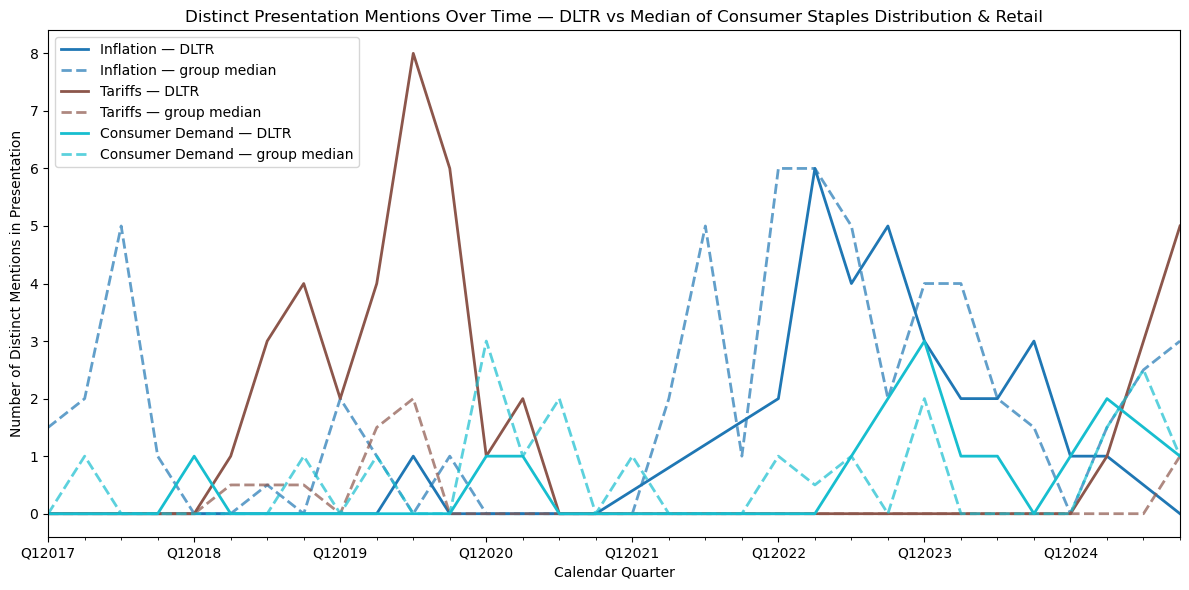

In [179]:
plot_filtered_mentions_vs_sector_median(
    df_new,
    index_to_topic_dict=index_to_topic_dict,
    topic_list=['inflation', 'tariffs', 'consumer_demand'],
                # 'supply_chain', 
    ticker='DLTR',
    use='median',
    title_suffix=None,
    custom_labels=['Inflation',  'Tariffs', 'Consumer Demand']
# 'Supply Chain',
)

In [153]:
df_new[df_new['ticker'] == 'PG']['assigned_quarter'].unique()

array(['2009Q3', '2009Q4', '2010Q1', '2010Q2', '2010Q3', '2010Q4',
       '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2014Q3', '2014Q4',
       '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
       '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2016Q3', '2016Q4',
       '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2',
       '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4',
       '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
       '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2023Q3', '2023Q4',
       '2024Q1', '2024Q2', '2024Q3', '2022Q3', '2022Q4', '2023Q1',
       '2023Q2', '2024Q4'], dtype=object)

In [155]:
def plot_mentions_two_tickers(
    df,
    index_to_topic_dict,
    topic_list,
    ticker1,
    ticker2,
    assigned_quarter_col='assigned_quarter',
    vector_column='presentation_distinct_vector',
    title_suffix=None,
    custom_labels=None  # New argument
):
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2017Q1']

    topic_name_to_index = {v: k for k, v in index_to_topic_dict.items()}
    selected_indices = [topic_name_to_index[name] for name in topic_list if name in topic_name_to_index]

    df1 = df[df['ticker'] == ticker1]
    df2 = df[df['ticker'] == ticker2]

    fig, ax = plt.subplots(figsize=(12, 6))

    # Fixed colors per topic
    color_map = cm.get_cmap('tab10', len(selected_indices))
    topic_colors = {index_to_topic_dict[idx]: mcolors.to_hex(color_map(i)) for i, idx in enumerate(selected_indices)}

    for i, idx in enumerate(selected_indices):
        topic_name = index_to_topic_dict[idx]
        color = topic_colors[topic_name]

        df1[topic_name] = df1[vector_column].apply(lambda vec: vec[idx])
        df2[topic_name] = df2[vector_column].apply(lambda vec: vec[idx])

        trend1 = df1.groupby(assigned_quarter_col)[topic_name].mean()
        trend2 = df2.groupby(assigned_quarter_col)[topic_name].mean()

        label1 = f"{topic_name} — {ticker1}"
        label2 = f"{topic_name} — {ticker2}"
        if custom_labels and i < len(custom_labels):
            label1 = f"{custom_labels[i]} — {ticker1}"
            label2 = f"{custom_labels[i]} — {ticker2}"

        trend1.plot(ax=ax, label=label1, color=color, linewidth=2)
        trend2.plot(ax=ax, label=label2, color=color, linestyle='--', alpha=0.6, linewidth=2)

    # Generate all Q1 ticks explicitly
    all_quarters = pd.period_range(df[assigned_quarter_col].min(), df[assigned_quarter_col].max(), freq='Q')
    q1_ticks = [q for q in all_quarters if q.quarter == 1]
    ax.set_xticks(q1_ticks)
    ax.set_xticklabels([f'Q1{q.year}' for q in q1_ticks], rotation=45)

    title = f"Distinct Presentation Mentions Over Time — {ticker1} vs {ticker2}"
    if title_suffix:
        title += f" — {title_suffix}"

    ax.set_title(title)
    ax.set_xlabel("Calendar Quarter")
    ax.set_ylabel("Number of Distinct Mentions in Presentation")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

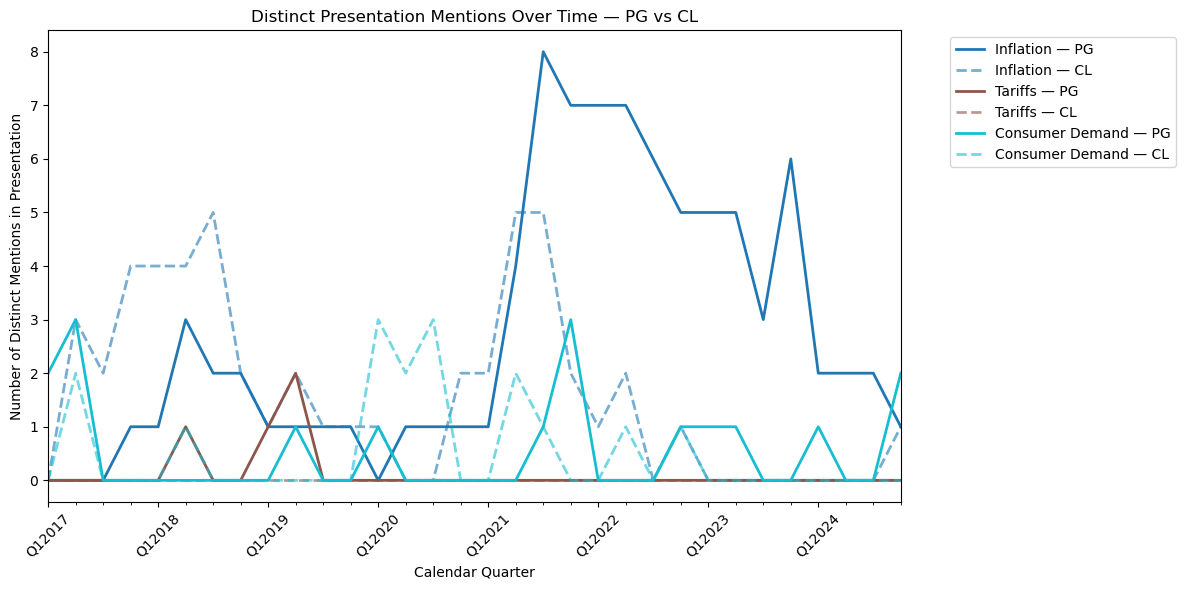

In [156]:
plot_mentions_two_tickers(
    df_new,
    index_to_topic_dict=index_to_topic_dict,
    topic_list=['inflation',  'tariffs', 'consumer_demand'],
    # 'supply_chain',
    ticker1='PG',
    ticker2='CL',
    custom_labels=['Inflation', 'Tariffs', 'Consumer Demand']
    # 'Supply Chain', 
)



In [93]:
print(df[df['ticker'] == 'LOW']['assigned_quarter'].unique())


['2010Q1' '2010Q2' '2010Q3' '2010Q4' '2011Q1' '2011Q2' '2011Q3' '2011Q4'
 '2012Q1' '2012Q2' '2012Q3' '2012Q4' '2013Q1' '2013Q2' '2013Q3' '2013Q4'
 '2014Q1' '2014Q2' '2014Q3' '2014Q4' '2015Q1' '2015Q2' '2015Q3' '2015Q4'
 '2016Q1' '2016Q2' '2016Q3' '2016Q4' '2017Q1' '2017Q2' '2017Q3' '2017Q4'
 '2018Q1' '2018Q2' '2018Q3' '2018Q4' '2019Q1' '2019Q2' '2019Q3' '2019Q4'
 '2020Q1' '2020Q2' '2020Q3' '2020Q4' '2021Q1' '2021Q2' '2021Q4' '2023Q1'
 '2024Q2' '2023Q3' '2024Q1' '2022Q1' '2022Q2' '2022Q3' '2022Q4' '2024Q4']


In [56]:
base_cols = [
    'ticker', 'year', 'assigned_quarter', 'quarter',
    'sector_name_mapped', 'ind_name_mapped',
    'group_name_mapped', 'subind_name_mapped'
]

# Add all columns that contain 'vector' in the name
vector_cols = [col for col in df.columns if 'vector' in col]

# Combine and filter
cols_to_keep = base_cols + vector_cols
df_filtered = df[cols_to_keep].copy()

In [83]:
path = "/scratch/network/mm4846/transcripts_2006_2025_03_31_distinct_pres_vectors.csv"

df_filtered.to_csv(path)

In [11]:
recurring_terms = [
    "buyback", "dividend", "capex", "debt",
    "guidance_forecasts", "liquidity_cash_flow",
    "operational", "regulation", "tax_strategy"
]

episodic_terms = [
    "interest_rates", "inflation", "tariffs", "geopolitical_2",
    "consumer_demand", "ai", "supply_chain", "labor",
    "pandemic", "climate", "commodity_price"
]

less_frequent_terms = [
    "esg_sustainability", "currency_fluctuations_hedging", "rd",
    "cybersecurity_data_protection", "reshoring",
    "outperform"
]

other_qs = [
    "other"]

# recurring_terms = recurring_topics
# episodic_terms = episodic_topics
# less_frequent_terms = less_frequent_topics

# Invert the index_to_topic_dict for lookup
topic_to_index = {v: k for k, v in index_to_topic_dict.items()}

# Helper function to map known terms to indices
def map_terms_to_indices(term_list):
    return [topic_to_index[term] for term in term_list if term in topic_to_index]

# Add new groupings
# grouped_indices['recurring'] = map_terms_to_indices(recurring_terms)
# grouped_indices['episodic'] = map_terms_to_indices(episodic_terms)
# grouped_indices['less_frequent'] = map_terms_to_indices(less_frequent_terms)
grouped_indices_frequency = {}
grouped_indices_frequency['Recurring'] = map_terms_to_indices(recurring_terms)
grouped_indices_frequency['Episodic'] = map_terms_to_indices(episodic_terms)
grouped_indices_frequency['Less Frequent'] = map_terms_to_indices(less_frequent_terms)

grouped_indices_theme = {}


# grouped_indices['other'] = map_terms_to_indices(other_qs)

In [13]:
# grouped_indices_frequency = grouped_indices

{'macroeconomic': [4, 5, 6, 13, 14, 15, 26],
 'corporate_finance': [1, 2, 8, 9, 16, 18, 27],
 'policy': [21, 23],
 'global_trends': [3, 11, 20],
 'business_trends': [0, 10, 12, 19, 22, 24, 25, 7, 17],
 'recurring': [1, 2, 8, 9, 12, 14, 15, 16, 17, 18, 19, 22, 23, 27],
 'episodic': [0, 3, 4, 5, 6, 11, 13, 20, 21, 25, 26],
 'other': [],
 'less_frequent': [7, 10, 24]}

In [21]:
index_to_topic_dict = {0: 'ai',
 1: 'buyback',
 2: 'capex',
 3: 'climate',
 4: 'commodity_price',
 5: 'consumer_demand',
 6: 'currency_fluctuations_hedging',
 7: 'cybersecurity_data_protection',
 8: 'debt',
 9: 'dividend',
 10: 'esg_sustainability',
 11: 'geopolitical_2',
 12: 'guidance_forecasts',
 13: 'inflation',
 14: 'interest_rates',
 15: 'labor',
 16: 'liquidity_cash_flow',
 17: 'm_and_a',
 18: 'operational',
 19: 'outperform',
 20: 'pandemic',
 21: 'political',
 22: 'rd',
 23: 'regulation',
 24: 'reshoring',
 25: 'supply_chain',
 26: 'tariffs',
 27: 'tax_strategy'}

grouped_indices_theme = {
    "Macroeconomic": [
        4, 5, 6, 13, 14, 15, 26  # commodity_price, consumer_demand, currency_fluctuations_hedging, inflation, interest_rates, labor, tariffs
    ],
    "Corporate Finance": [
        1, 2, 8, 9, 16, 18, 27  # buyback, capex, debt, dividend, liquidity_cash_flow, operational, tax_strategy
    ],
    "Policy": [
        21, 23  # political, regulation
    ],
    "Global Trends": [
        3, 11, 20  # climate, geopolitical_2, pandemic
    ],
    "Business Trends": [
        0, 10, 12, 19, 22, 24, 25, 7, 17  # ai, esg_sustainability, guidance_forecasts, outperform, rd, reshoring, supply_chain, cybersecurity_data_protection
    ],
}
    
# 'recurring': [1, 9, 2, 8, 12, 16, 18, 23, 27],
#  'episodic': [14, 13, 26, 11, 5, 0, 25, 15, 20, 3, 4],
#  'other': [],
#  'less_frequent': [10, 6, 22, 15, 7, 24, 19]
# }


In [34]:
macroeconomic_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['macroeconomic'])
}

corporate_finance_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['corporate_finance'])
}

policy_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['policy'])
}

global_trends_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['global_trends'])
}

business_trends_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['business_trends'])
}


business_trends_mapping


{1: 'ai',
 2: 'esg_sustainability',
 3: 'guidance_forecasts',
 4: 'outperform',
 5: 'rd',
 6: 'reshoring',
 7: 'supply_chain',
 8: 'cybersecurity_data_protection',
 9: 'm_and_a'}

In [72]:
topic_to_index = {v: k for k, v in index_to_topic_dict.items()}

# Function to build mapping
def build_mapping(term_list):
    return {i + 1: term for i, term in enumerate(term_list) if term in topic_to_index}

# Final mappings
recurring_mapping = build_mapping(recurring_terms)
episodic_mapping = build_mapping(episodic_terms)
less_frequent_mapping = build_mapping(less_frequent_terms)

In [73]:
recurring_mapping

{1: 'buyback',
 2: 'dividend',
 3: 'capex',
 4: 'debt',
 5: 'guidance_forecasts',
 6: 'liquidity_cash_flow',
 7: 'operational',
 8: 'regulation',
 9: 'tax_strategy'}

In [76]:
macroeconomic_mapping = {1: 'commodity_price', 2: 'consumer_demand', 3: 'currency_fluctuations_hedging', 
                         4: 'inflation', 5: 'interest_rates', 6: 'labor', 7: 'tariffs'}

corporate_finance_mapping = {1: 'buyback', 2: 'capex', 3: 'debt', 4: 'dividend', 5: 'liquidity_cash_flow',
                             6: 'operational', 7: 'tax_strategy'}

policy_mapping = {1: 'political', 2: 'regulation'}

global_trends_mapping = {1: 'climate', 2: 'geopolitical_2', 3: 'pandemic'}

business_trends_mapping = {1: 'ai', 2: 'esg_sustainability', 3: 'guidance_forecasts', 4: 'outperform', 
                           5: 'rd', 6: 'reshoring', 7: 'supply_chain', 8: 'cybersecurity_data_protection', 9: 'm_and_a'}

recurring_mapping = {1: 'buyback',
 2: 'dividend',
 3: 'capex',
 4: 'debt',
 5: 'guidance_forecasts',
 6: 'liquidity_cash_flow',
 7: 'operational',
 8: 'regulation',
 9: 'tax_strategy'}

episodic_mapping = {1: 'interest_rates',
 2: 'inflation',
 3: 'tariffs',
 4: 'geopolitical_2',
 5: 'consumer_demand',
 6: 'ai',
 7: 'supply_chain',
 8: 'labor',
 9: 'pandemic',
 10: 'climate',
 11: 'commodity_price'}

less_frequent_mapping = {1: 'esg_sustainability',
 2: 'currency_fluctuations_hedging',
 3: 'rd',
 4: 'cybersecurity_data_protection',
 5: 'reshoring',
 6: 'outperform'}

In [2]:
df.columns[7:]

Index(['group_name_mapped', 'subind_name_mapped',
       'presentation_distinct_vector', 'macroeconomic_vector',
       'corporate_finance_vector', 'policy_vector', 'global_trends_vector',
       'business_trends_vector'],
      dtype='object')

In [3]:
# df_vectorized['questions_vector'][31275]
import ast
import numpy as np
def safe_parse_vector(val):
    if isinstance(val, str) and val.strip().startswith("["):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return np.nan  # or [] if you prefer empty lists
    return np.nan  # or [] for consistency

# Apply safely

column_names = df.columns[9:]
column_names
for name in column_names: 
    df[name] = df[name].apply(safe_parse_vector)



In [7]:
len(df['presentation_distinct_vector'][0])

28

In [5]:
topic_names = [index_to_topic_dict[i] for i in range(28)]
topic_df = pd.DataFrame(df['presentation_distinct_vector'].tolist(), columns=topic_names)
topic_df['assigned_quarter'] = df['assigned_quarter']

# Convert to binary: 1 if mentioned, 0 if not
binary_topic_df = topic_df.copy()
binary_topic_df[topic_names] = binary_topic_df[topic_names].applymap(lambda x: 1 if x > 0 else 0)

# Group by quarter and count how many companies mention each topic (non-zero count)
quarterly_topic_counts = binary_topic_df.groupby('assigned_quarter')[topic_names].sum().sort_index()

# Compute mean and max number of companies mentioning each topic per quarter
topic_stats = pd.DataFrame({
    'mean': quarterly_topic_counts.mean(),
    'max': quarterly_topic_counts.max()
})

# Apply thresholds to define less frequent topics
mean_threshold = 80
max_threshold = 130

less_frequent_topics = topic_stats[
    (topic_stats['mean'] < mean_threshold) & 
    (topic_stats['max'] < max_threshold)
].index.tolist()

print("Less frequent topics:", less_frequent_topics)

# Drop less frequent topics
filtered_counts = quarterly_topic_counts.drop(columns=less_frequent_topics)

# Compute mean, std, and coefficient of variation (CV)
topic_stats_filtered = pd.DataFrame({
    'mean': filtered_counts.mean(),
    'std': filtered_counts.std()
})
topic_stats_filtered['cv'] = topic_stats_filtered['std'] / topic_stats_filtered['mean']

# Classify into episodic vs recurring based on CV
cv_threshold = 0.35
episodic_topics = topic_stats_filtered[topic_stats_filtered['cv'] > cv_threshold].index.tolist()
recurring_topics = topic_stats_filtered[topic_stats_filtered['cv'] <= cv_threshold].index.tolist()

print("Episodic topics:", episodic_topics)
print("Recurring topics:", recurring_topics)


/tmp/ipykernel_353174/953434623.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_topic_df[topic_names] = binary_topic_df[topic_names].applymap(lambda x: 1 if x > 0 else 0)


Less frequent topics: ['cybersecurity_data_protection', 'esg_sustainability', 'reshoring']
Episodic topics: ['ai', 'climate', 'commodity_price', 'consumer_demand', 'currency_fluctuations_hedging', 'geopolitical_2', 'inflation', 'pandemic', 'political', 'supply_chain', 'tariffs']
Recurring topics: ['buyback', 'capex', 'debt', 'dividend', 'guidance_forecasts', 'interest_rates', 'labor', 'liquidity_cash_flow', 'm_and_a', 'operational', 'outperform', 'rd', 'regulation', 'tax_strategy']


In [6]:
topic = 'currency_fluctuations_hedging'  # change this to any topic you're interested in
print(quarterly_topic_counts[topic].mean())

topic = 'tax_strategy'  # change this to any topic you're interested in
cv = topic_stats_filtered.loc[topic, 'cv']
print(f"CV of {topic}: {cv:.3f}")

114.84375
CV of tax_strategy: 0.305
